In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd


In [ ]:
# Q1(a)

X = np.array([[0, 2], [1, 0], [3, 4]], dtype=float)

print("X: ", X)

print("X.T @ X: ", X.T @ X)

# Eigendecomposition of X.T @ X
eigenvalues, eigenvectors = np.linalg.eig(X.T @ X)

print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: ", eigenvectors)

# SVD of X:
U, S, V = np.linalg.svd(X)

print("U: ", U)
print("S: ", S)
print("V: ", V)


X:  [[0. 2.]
 [1. 0.]
 [3. 4.]]
X.T @ X:  [[10. 12.]
 [12. 20.]]
Eigenvalues:  [ 2. 28.]
Eigenvectors:  [[-0.83205029 -0.5547002 ]
 [ 0.5547002  -0.83205029]]
Manual Eigenvectors:  [[ 0.83205029  0.5547002 ]
 [-0.5547002   0.83205029]]
U:  [[-0.31448545  0.78446454 -0.53452248]
 [-0.10482848 -0.58834841 -0.80178373]
 [-0.94345635 -0.19611614  0.26726124]]
S:  [5.29150262 1.41421356]
V:  [[-0.5547002  -0.83205029]
 [-0.83205029  0.5547002 ]]


In [ ]:
# Q1(b)

# Power Method for A = X @ X.T
A = X @ X.T

x0 = np.array([1, 0, 0])

x1 = A @ x0
print("x1: ", x1)
print("x1 norm: ", np.linalg.norm(x1))
x1 = x1 / np.linalg.norm(x1)
print("normalized x1: ", x1)

x2 = A @ x1
print("x2: ", x2)
print("x2 norm: ", np.linalg.norm(x2))
x2 = x2 / np.linalg.norm(x2)
print("normalized x2: ", x2)

# Approximate Eigenvalue for A

lambda1 = x2.T @ A @ x2 / (x2.T @ x2)
print("Approximate Eigenvalue for A: ", lambda1)


x1:  [4. 0. 8.]
x1 norm:  8.94427190999916
normalized x1:  [0.4472136  0.         0.89442719]
x2:  [ 8.94427191  2.68328157 25.93838854]
x2 norm:  27.568097504180447
normalized x2:  [0.32444284 0.09733285 0.94088424]
Approximate Eigenvalue for A:  27.995789473684212
[ 54.4  18.  162.8]


In [ ]:
# Q4(a) Centering the data

# how busy the station is (rides per day)
daily_rentals = np.array([1100, 950, 800, 420, 380, 500, 700, 300], dtype=float)
# typical trip duration in minutes
avg_trip_min = np.array([14, 16, 18, 45, 52, 40, 20, 55], dtype=float)
# 0 to 1, proportion of weekend rides (tourism / leisure)
weekend_share = np.array([0.22, 0.25, 0.28, 0.75, 0.78, 0.70, 0.35, 0.8], dtype=float)
# avg user satisfaction
user_rating = np.array([4.0, 3.9, 4.1, 4.7, 4.8, 4.6, 4.2, 4.7], dtype=float)

# Create data matrix (8x4)
X = np.column_stack([daily_rentals, avg_trip_min, weekend_share, user_rating])

# Create centering matrix and center the data
n = X.shape[0]
ones = np.ones((n, 1))
Cn = np.eye(n) - (1 / n) * (ones @ ones.T)
A = Cn @ X  # Centered matrix (8x4)

print("Original X shape:", X.shape)
print("Centering matrix Cn shape:", Cn.shape)
print("Centered X shape:", A.shape)
print("\nCentered data:\n", A)

# Verify: column means should be ~0
print("\nColumn means (should be ~0):", A.mean(axis=0))

Original X shape: (8, 4)
Centering matrix Cn shape: (8, 8)
Centered X shape: (8, 4)

Centered data:
 [[ 4.5625e+02 -1.8500e+01 -2.9625e-01 -3.7500e-01]
 [ 3.0625e+02 -1.6500e+01 -2.6625e-01 -4.7500e-01]
 [ 1.5625e+02 -1.4500e+01 -2.3625e-01 -2.7500e-01]
 [-2.2375e+02  1.2500e+01  2.3375e-01  3.2500e-01]
 [-2.6375e+02  1.9500e+01  2.6375e-01  4.2500e-01]
 [-1.4375e+02  7.5000e+00  1.8375e-01  2.2500e-01]
 [ 5.6250e+01 -1.2500e+01 -1.6625e-01 -1.7500e-01]
 [-3.4375e+02  2.2500e+01  2.8375e-01  3.2500e-01]]

Column means (should be ~0): [0.00000000e+00 0.00000000e+00 1.38777878e-17 2.22044605e-16]


In [28]:
# Q4(b) Applying PCA for first 2 PCs

# Perform reduced SVD: A = U S V^T
U, S, VT = np.linalg.svd(A, full_matrices=False)
V = VT.T  # Transpose to get V (4x4)

print("A shape (centered data):", A.shape)
print("U shape:", U.shape)
print("S shape (singular values):", S.shape)
print("V shape:", V.shape)
print("\nSingular values:", S)

# Project data onto first 2 principal components
# A @ V[:, :2] gives us the projection
A_pca = A @ V[:, :2]  # (8x4) @ (4x2) = (8x2)

print("\n" + "=" * 50)
print("TRANSFORMED DATA (8x2 matrix):")
print("=" * 50)
print(A_pca)
print("\nShape:", A_pca.shape)

# Explained variance
explained_variance_ratio = (S**2) / np.sum(S**2)
print("\n" + "=" * 50)
print("EXPLAINED VARIANCE:")
print("=" * 50)
print(
    f"PC1: {explained_variance_ratio[0]:.4f} ({explained_variance_ratio[0]*100:.4f}%)"
)
print(
    f"PC2: {explained_variance_ratio[1]:.4f} ({explained_variance_ratio[1]*100:.4f}%)"
)
print(
    f"Total (first 2 PCs): {explained_variance_ratio[:2].sum():.4f} ({explained_variance_ratio[:2].sum()*100:.4f}%)"
)

A shape (centered data): (8, 4)
U shape: (8, 4)
S shape (singular values): (4,)
V shape: (4, 4)

Singular values: [7.68027155e+02 1.42523360e+01 2.25713037e-01 7.29851056e-02]

TRANSFORMED DATA (8x2 matrix):
[[-4.56567238e+02 -7.27282337e+00]
 [-3.06693576e+02 -8.02835210e-01]
 [-1.56819558e+02  5.66295933e+00]
 [ 2.24099190e+02  1.42283167e-01]
 [ 2.64430511e+02 -4.58967854e+00]
 [ 1.43944445e+02  6.20569152e-01]
 [-5.68659296e+01  9.30786141e+00]
 [ 3.44472155e+02 -3.06833594e+00]]

Shape: (8, 2)

EXPLAINED VARIANCE:
PC1: 0.9997 (99.9656%)
PC2: 0.0003 (0.0344%)
Total (first 2 PCs): 1.0000 (100.0000%)



PART (c): CLASSICAL MDS
Distance matrix D (8x8):
[[  0.         150.01336907 300.02668815 680.70681714 721.00274174
  600.56356067 400.04506859 801.05045184]
 [150.01336907   0.         150.01346906 530.79364163 571.13666569
  450.64031389 250.03219793 651.16967259]
 [300.02668815 150.01346906   0.         380.95876535 421.37482127
  300.80629382 100.02007249 501.36775963]
 [680.70681714 530.79364163 380.95876535   0.          40.60801522
   80.15617568 281.11458518 120.41595617]
 [721.00274174 571.13666569 421.37482127  40.60801522   0.
  120.59869983 321.59686706  80.05629519]
 [600.56356067 450.64031389 300.80629382  80.15617568 120.59869983
    0.         200.99821517 200.56176106]
 [400.04506859 250.03219793 100.02007249 281.11458518 321.59686706
  200.99821517   0.         401.52889373]
 [801.05045184 651.16967259 501.36775963 120.41595617  80.05629519
  200.56176106 401.52889373   0.        ]]

D shape: (8, 8)

Matrix B (double-centered, 8x8):
[[ 208506.54088906  140032.0695015

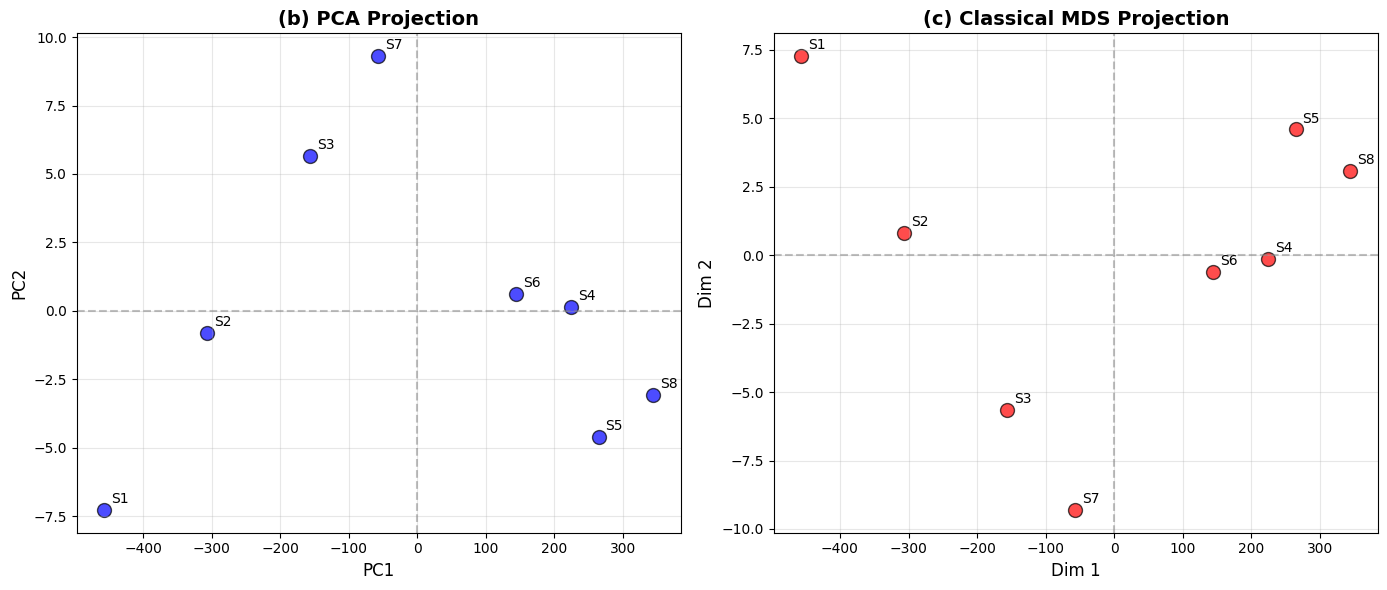


INTERPRETATION


In [32]:
# Q4(c)

# Step 1: Compute pairwise distance matrix D
D = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        D[i, j] = np.linalg.norm(A[i] - A[j])

print("\n" + "=" * 60)
print("PART (c): CLASSICAL MDS")
print("=" * 60)
print("Distance matrix D (8x8):")
print(D)
print("\nD shape:", D.shape)

# Step 2: Compute squared distance matrix
D_squared = D**2

# Step 3: Double centering to get B
# B = -0.5 * Cn @ D² @ Cn
B = -0.5 * Cn @ D_squared @ Cn

print("\nMatrix B (double-centered, 8x8):")
print(B)

# Step 4: Eigendecomposition of B
eigenvalues, eigenvectors = np.linalg.eigh(B)

# Sort in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("\nEigenvalues:", eigenvalues)

# Step 5: cMDS projection (first 2 dimensions)
# A_mds = eigenvectors[:, :2] @ sqrt(eigenvalues[:2])
A_mds = eigenvectors[:, :2] @ np.diag(np.sqrt(np.maximum(eigenvalues[:2], 0)))

print("\nTransformed data via cMDS (8x2):")
print(A_mds)

# ============================================================
# COMPARISON
# ============================================================
print("\n" + "=" * 60)
print("COMPARISON: PCA vs cMDS")
print("=" * 60)
print("\nPCA projection:")
print(A_pca)
print("\ncMDS projection:")
print(A_mds)

# Check if they're the same up to sign/reflection
print("\nAre they identical (up to sign)?")
# Compare absolute values or check correlation
correlation_pc1 = np.corrcoef(A_pca[:, 0], A_mds[:, 0])[0, 1]
correlation_pc2 = np.corrcoef(A_pca[:, 1], A_mds[:, 1])[0, 1]
print(f"Correlation PC1: {correlation_pc1:.6f}")
print(f"Correlation PC2: {correlation_pc2:.6f}")

# ============================================================
# VISUALIZATION
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot PCA
axes[0].scatter(
    A_pca[:, 0], A_pca[:, 1], s=100, alpha=0.7, c="blue", edgecolors="black"
)
for i in range(n):
    axes[0].annotate(
        f"S{i+1}",
        (A_pca[i, 0], A_pca[i, 1]),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
    )
axes[0].axhline(y=0, color="gray", linestyle="--", alpha=0.5)
axes[0].axvline(x=0, color="gray", linestyle="--", alpha=0.5)
axes[0].set_xlabel("PC1", fontsize=12)
axes[0].set_ylabel("PC2", fontsize=12)
axes[0].set_title("(b) PCA Projection", fontsize=14, fontweight="bold")
axes[0].grid(True, alpha=0.3)

# Plot cMDS
axes[1].scatter(A_mds[:, 0], A_mds[:, 1], s=100, alpha=0.7, c="red", edgecolors="black")
for i in range(n):
    axes[1].annotate(
        f"S{i+1}",
        (A_mds[i, 0], A_mds[i, 1]),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
    )
axes[1].axhline(y=0, color="gray", linestyle="--", alpha=0.5)
axes[1].axvline(x=0, color="gray", linestyle="--", alpha=0.5)
axes[1].set_xlabel("Dim 1", fontsize=12)
axes[1].set_ylabel("Dim 2", fontsize=12)
axes[1].set_title("(c) Classical MDS Projection", fontsize=14, fontweight="bold")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# INTERPRETATION
# ============================================================
print("\n" + "=" * 60)
print("INTERPRETATION")
print("=" * 60)

Key Findings:

1. **Mathematical Equivalence**:
   - PCA and cMDS are mathematically equivalent when applied to
   centered Euclidean distances. They produce the same configuration
   up to rotation/reflection.

2. **Why they match**:
   - PCA: A = U Σ V^T, projection = U[:,:2] @ Σ[:2]
   - cMDS: B = A @ A^T (Gram matrix), eigendecomposition gives U @ Σ²
   - Both recover the same low-dimensional representation

3. **Station groupings** (visible in plots):
   - High-traffic urban stations (S1, S2, S3, S7): One cluster
   - Low-traffic leisure stations (S4, S5, S6, S8): Another cluster

<!-- 4. **Practical difference**:
   - PCA: Works directly with features (requires centered data)
   - cMDS: Works with distance matrix (can use any distance metric)
   - cMDS more flexible for non-Euclidean distances -->

